In [75]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
import re
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [10]:
# The XML file path
file_path = "/Users/lilitpoghosyan/Desktop/s362431a.txt"  

In [11]:
# Reading the XML content from the file
with open(file_path, "r", encoding="utf-8") as file:
    xml_content = file.read().strip()

In [12]:
# Finding all <ep-bulletin> sections 
#every patent section is enclosed within <ep-bulletin> and </ep-bulletin> tags
patent_sections = re.findall(r'(<ep-bulletin.*?</ep-bulletin>)', xml_content, re.DOTALL)

In [13]:
# Optionally, display a sample of the first patent to verify extraction
if patent_sections:
    print("\nSample of the First Patent Section:")
    print(patent_sections[0][:1000])  
    print(f"Total Patents Found in the File: {len(patent_sections)}")


Sample of the First Patent Section:
<ep-bulletin id="EP07829819A1" file="07829819.7" lang="en" country="EP" doc-number="2078696" kind="A1" date-publ="20240731" status="r" dtd-version="ep-bulletin-v1-7"><SDOBI lang="en"><B000><eptags><B001EP>ATBECHDEDKESFRGBGRITLILUNLSEMCPTIESILTLVFIRO..CY..TRBGCZEEHUPLSK....IS..MT..........................</B001EP><B002EP><ep-chg-info><ep-chg idref="ep-chg0001" btag="B237" date="20240627" status="n"/></ep-chg-info></B002EP><B007EP>0009183-ADWI03</B007EP></eptags></B000><B100><B110>2078696</B110><B120><B121>EUROPEAN PATENT APPLICATION</B121><B121EP>published in accordance with Art. 153(4) EPC</B121EP></B120><B130>A1</B130><B140><date>20240731</date></B140><B190>EP</B190></B100><B200><B210>07829819.7</B210><B220><date>20071015</date></B220><B230><B237 id="ep-chg0001"><date>20240301</date></B237></B230><B240><B241><date>20090421</date></B241><B242><date>20160524</date></B242></B240><B250>ja</B250><B251EP>en</B251EP><B260>en</B260></B200><B300><B310>20062

In [49]:
data_list = []
for idx, patent_xml in enumerate(patent_sections):
    try:
        # Parse the XML data
        root = ET.fromstring(patent_xml)

        # Metadata
        patent_id = root.attrib.get("id", "N/A")
        publication_date = root.attrib.get("date-publ", "N/A")
        country = root.attrib.get("country", "N/A")
        doc_number = root.attrib.get("doc-number", "N/A")
        kind = root.attrib.get("kind", "N/A")

        # Application Details
        app_number = root.find(".//B210").text if root.find(".//B210") is not None else "N/A"
        filing_date = root.find(".//B220/date").text if root.find(".//B220/date") is not None else "N/A"

        # Priority Details
        priority_numbers = [pri.text for pri in root.findall(".//B300/B310") if pri.text]
        priority_dates = [pri_date.text for pri_date in root.findall(".//B300/B320/date") if pri_date.text]
        priority_numbers = ", ".join(priority_numbers) if priority_numbers else "N/A"
        priority_dates = ", ".join(priority_dates) if priority_dates else "N/A"

        # Title Information
        title = "N/A"
        b540 = root.find(".//B540")
        if b540 is not None:
            b541_tags = b540.findall("B541")
            b542_tags = b540.findall("B542")
            for i in range(len(b541_tags)):
                if b541_tags[i].text == "en":  # Check if the title is in English
                    if i < len(b542_tags):
                        title = b542_tags[i].text
                    break

        # IPC Codes
        classifications = [elem.text for elem in root.findall(".//classification-ipcr/text") if elem.text]
        classification_codes = ", ".join(classifications) if classifications else "N/A"

        # Applicant Details
        applicant_name = root.find(".//B700/B710/B711/snm")
        applicant_name = applicant_name.text if applicant_name is not None else "N/A"

        applicant_country = root.find(".//B700/B710/B711/adr/ctry")
        applicant_country = applicant_country.text if applicant_country is not None else "N/A"
        
        
        # Designated countries where patent is valid
        designated_countries = [ctry.text for ctry in root.findall(".//B800/B840/ctry")]
        designated_countries = ", ".join(designated_countries) if designated_countries else "N/A"
        
        data_list.append({
            "Patent ID": patent_id,
            "Publication Date": publication_date,
            "Country": country,
            "Document Number": doc_number,
            "Patent Type": kind,
            "Application Number": app_number,
            "Filing Date": filing_date,
            "Priority Numbers": priority_numbers,
            "Priority Dates": priority_dates,
            "Title": title,
            "IPC Codes": classification_codes,
            "Applicant Name": applicant_name,
            "Applicant Country": applicant_country
            "Designated Countries": designated_countries
        })

    except ET.ParseError as e:
        print(f"Error parsing patent {idx + 1}: {e}")


In [52]:
pd.set_option("display.max_colwidth", None)  
pd.set_option("display.max_rows", 50)  
pd.set_option("display.max_columns", None) 

In [53]:
display(df.head(5)) 

,Patent ID,Publication Date,Country,Document Number,Patent Type,Application Number,Filing Date,Priority Numbers,Priority Dates,Title,IPC Codes,Applicant Name,Applicant Country
0,EP07829819A1,20240731,EP,2078696,A1,07829819.7,20071015,"2006295958, 2006337561, 2007011776","20061031, 20061214, 20070122",MESOPOROUS SILICA PARTICLES,"C01B 37/02 20060101AFI20150727BHEP , C01B 33/18 20060101ALI20150727BHEP , B01J 20/28 20060101ALI20150727BHEP , B01J 20/32 20060101ALI20150727BHEP , B01J 21/08 20060101ALI20150727BHEP , B01J 35/02 20060101ALI20150727BHEP , B01J 35/08 20060101ALI20150727BHEP , B01J 35/10 20060101ALI20150727BHEP , B01J 20/10 20060101ALI20150727BHEP",Kao Corporation,JP
1,EP08703391A1,20240731,EP,2105678,A1,08703391.6,20080117,2007008567,20070117,"AIR CONDITIONING BLOW OUT PANEL, AIR CONDITIONING CONTROL SYSTEM PROVIDED WITH THE AIR CONDITIONING BLOW OUT PANEL AND AIR CONDITIONING CONTROL METHOD","F24F 11/30 20180101AFI20230825BHEP , F24F 11/77 20180101ALI20230825BHEP , F24F 11/79 20180101ALI20230825BHEP , F24F 110/00 20180101ALI20230825BHEP , F24F 120/10 20180101ALI20230825BHEP , F24F 11/56 20180101ALI20230825BHEP , F24F 11/54 20180101ALI20230825BHEP , F24F 1/0047 20190101ALI20230825BHEP , F24F 11/74 20180101ALI20230825BHEP","Daikin Industries, Ltd.",JP
2,EP08792993A2,20240731,EP,2185762,A2,08792993.1,20080801,20070078141,20070803,CLOTHES TREATING APPARATUS,"D06F 58/10 20060101AFI20240126BHEP , D06F 58/20 20060101ALN20240126BHEP",LG Electronics Inc.,KR
3,EP09705463A1,20240731,EP,2244759,A1,09705463.9,20090128,6711 P,20080128,A FILTER CLEANING DEVICE,A61M 1/00 20060101AFI20161103BHEP,Implantica Patent Ltd.,SE
4,EP10250320A2,20240731,EP,2221151,A2,10250320.8,20100224,391780,20090224,Autonomous robotic assembly system comprising a plurality of mobile robotic machines and a wireless communication system,"B25J 9/00 20060101AFI20240627BHEP , B64F 5/00 20060101ALI20240627BHEP , B64F 5/10 20170101ALI20240627BHEP",The Boeing Company,US


In [64]:
# Converting filing date format
df["Filing Date"] = pd.to_datetime(df["Filing Date"], format="%Y%m%d", errors="coerce")
print(df[["Filing Date"]].head())

0   2007-10-15
1   2008-01-17
2   2008-08-01
3   2009-01-28
4   2010-02-24
Name: Filing Date, dtype: datetime64[ns]
  Filing Date
0  2007-10-15
1  2008-01-17
2  2008-08-01
3  2009-01-28
4  2010-02-24


In [65]:
# Extracting the year from the Filing Date column
df["Filing Year"] = df["Filing Date"].dt.year
print(df[["Filing Date", "Filing Year"]].head())


  Filing Date  Filing Year
0  2007-10-15         2007
1  2008-01-17         2008
2  2008-08-01         2008
3  2009-01-28         2009
4  2010-02-24         2010


In [66]:
missing_dates = df["Filing Date"].isnull().sum()

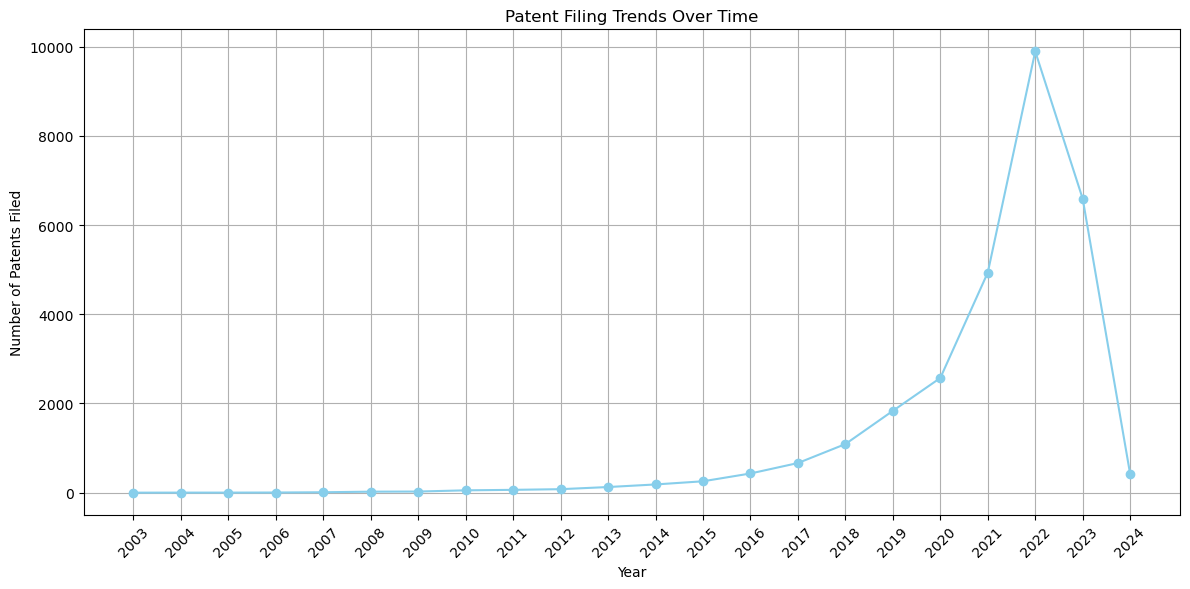

In [71]:
filing_trends = df["Filing Year"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(filing_trends.index, filing_trends.values, marker="o", linestyle="-", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Patents Filed")
plt.title("Patent Filing Trends Over Time")
plt.grid(True)
min_year = filing_trends.index.min()
max_year = filing_trends.index.max()
all_years = np.arange(min_year, max_year + 1, 1) 
plt.xticks(all_years, rotation=45)  
plt.tight_layout()
plt.show()


In [87]:
# IPC Codes N/A = "The designation of the inventor has not yet been filed"
pattern = r'\b[A-Z]\d{2}[A-Z]?\s+\d{1,3}/\d{2}\b'
df['Extracted IPC Codes'] = df['IPC Codes'].apply(lambda x: ', '.join(re.findall(pattern, str(x))) if pd.notna(x) else 'N/A')
df['Extracted IPC Codes'] = df['Extracted IPC Codes'].replace('', 'N/A')
cleaned_na_count = (df['Extracted IPC Codes'] == 'N/A').sum()
print(f"Cleaned 'N/A' count in 'Extracted IPC Codes': {cleaned_na_count}")

Cleaned 'N/A' count in 'Extracted IPC Codes': 1652


In [88]:
all_extracted_codes = [code.strip() for row in df['Extracted IPC Codes'].str.split(', ').dropna() for code in row]
code_counts = Counter(all_extracted_codes)
code_df = pd.DataFrame(code_counts.most_common(), columns=['IPC Code', 'Frequency'])
print(code_df)

          IPC Code  Frequency
0              N/A       1652
1      A61P  35/00        540
2      H04L   5/00        358
3      A61B   5/00        351
4      H04W  72/04        283
...            ...        ...
20630  A24C   5/35          1
20631  B21J  15/14          1
20632  A01G   9/26          1
20633  C08L  99/00          1
20634  G06F  16/26          1

[20635 rows x 2 columns]


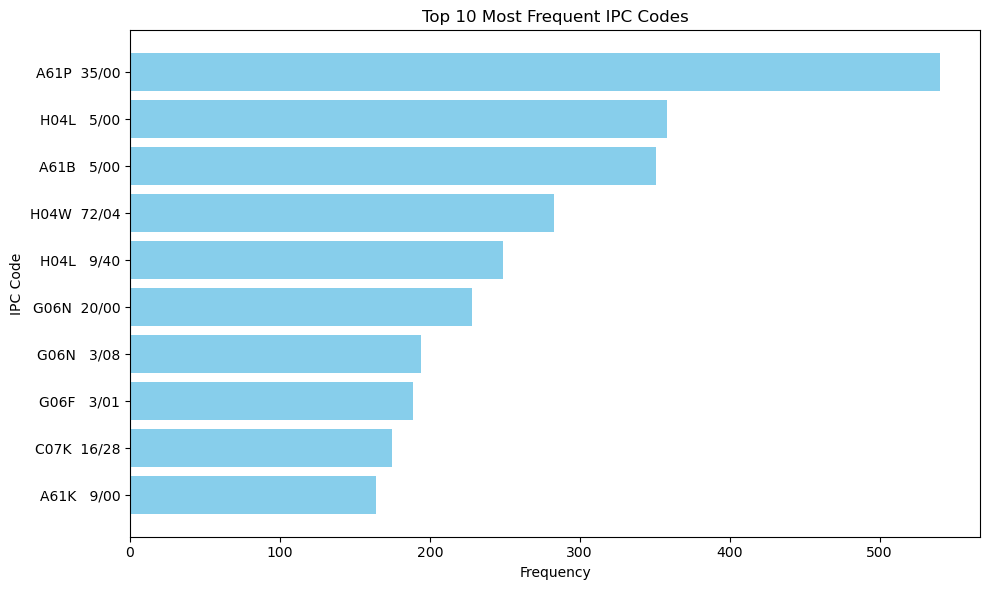

In [90]:
# Exclude 'N/A' values from the extracted IPC codes
valid_ipc_codes = df[df['Extracted IPC Codes'] != 'N/A']
all_extracted_codes = [code.strip() for row in valid_ipc_codes['Extracted IPC Codes'].str.split(', ').dropna() for code in row]
code_counts = Counter(all_extracted_codes)
code_df = pd.DataFrame(code_counts.most_common(), columns=['IPC Code', 'Frequency'])
#'Top 10 Most Frequent IPC Codes (Single file)
plt.figure(figsize=(10, 6))
plt.barh(code_df['IPC Code'][:10], code_df['Frequency'][:10], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('IPC Code')
plt.title('Top 10 Most Frequent IPC Codes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()